<a href="https://colab.research.google.com/github/PandikalaPk/AUSSIG-ML/blob/main/TaskOneP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#Task 1P

#Task 1P

Sensor readings, with temperature, light, humidity every 5 minutes at 8
locations (trial, 2014 to 2015)

In [37]:
#import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mode
import pickle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv to sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv


In [ ]:
dataframe = pd.read_csv("sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv")

In [ ]:
dataframe.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"


In [ ]:
dataframe.dtypes

timestamp        object
mac              object
boardtype         int64
boardid           int64
temp_max        float64
temp_min        float64
temp_avg        float64
light_max       float64
light_min       float64
light_avg       float64
humidity_min    float64
humidity_max    float64
humidity_avg    float64
model            object
latitude        float64
longitude       float64
elevation       float64
location         object
rowid            object
Position        float64
geolocation      object
dtype: object

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     56570 non-null  object 
 1   mac           56570 non-null  object 
 2   boardtype     56570 non-null  int64  
 3   boardid       56570 non-null  int64  
 4   temp_max      56570 non-null  float64
 5   temp_min      56570 non-null  float64
 6   temp_avg      56570 non-null  float64
 7   light_max     56570 non-null  float64
 8   light_min     56570 non-null  float64
 9   light_avg     56570 non-null  float64
 10  humidity_min  56570 non-null  float64
 11  humidity_max  56570 non-null  float64
 12  humidity_avg  56570 non-null  float64
 13  model         56570 non-null  object 
 14  latitude      56570 non-null  float64
 15  longitude     56570 non-null  float64
 16  elevation     34975 non-null  float64
 17  location      56570 non-null  object 
 18  rowid         56570 non-nu

In [ ]:
dataframe.columns[dataframe.isnull().any()]

Index(['elevation', 'Position'], dtype='object')

In [ ]:
print(dataframe.isna().sum())

timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation       21595
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64


In [ ]:
dataframe.fillna(dataframe.Position)
dataframe.fillna(dataframe.elevation)

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56565,2015-01-05T16:45:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.4,3.4,3.4,...,61.4,61.4,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150105111500,NaN,"-37.8199043, 144.9404851"
56566,2015-01-05T16:50:00+05:30,0013a20040b4b755,1,508,17.1,17.1,17.1,2.1,2.1,2.1,...,50.3,50.3,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20150105112000,NaN,"-37.8134078, 144.9794923"
56567,2015-01-05T16:55:00+05:30,0013a20040b31583,1,509,18.1,18.1,18.1,3.5,3.5,3.5,...,62.5,62.5,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150105112500,NaN,"-37.8199043, 144.9404851"
56568,2015-01-05T16:55:00+05:30,0013a20040b31571,1,510,17.1,17.1,17.1,1.3,1.3,1.3,...,54.1,54.1,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150105112500,NaN,"-37.8197121, 144.9413253"


In [ ]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
boardtype,56570.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
boardid,56570.0,507.918738,2.673337,501.000000,506.000000,509.000000,510.000000,511.000000
temp_max,56570.0,18.522650,5.498701,4.200000,14.800000,17.700000,21.900000,45.200000
temp_min,56570.0,18.522650,5.498701,4.200000,14.800000,17.700000,21.900000,45.200000
temp_avg,56570.0,18.522650,5.498701,4.200000,14.800000,17.700000,21.900000,45.200000
light_max,56570.0,48.674527,43.973493,0.000000,2.900000,49.900000,94.900000,98.700000
light_min,56570.0,48.674527,43.973493,0.000000,2.900000,49.900000,94.900000,98.700000
light_avg,56570.0,48.674527,43.973493,0.000000,2.900000,49.900000,94.900000,98.700000
humidity_min,56570.0,49.431043,13.413633,-24.900000,41.700000,51.000000,58.700000,102.500000
humidity_max,56570.0,49.431043,13.413633,-24.900000,41.700000,51.000000,58.700000,102.500000


In [ ]:
percent_missing = dataframe.isnull().sum() * 100/len(dataframe)
missing_value = pd.DataFrame({'Column Name' : dataframe.columns,'Percentage_Missing' :
1pippercent_missing})
missing_value

,Column Name,Percentage_Missing
timestamp,timestamp,0.000000
mac,mac,0.000000
boardtype,boardtype,0.000000
boardid,boardid,0.000000
temp_max,temp_max,0.000000
temp_min,temp_min,0.000000
temp_avg,temp_avg,0.000000
light_max,light_max,0.000000
light_min,light_min,0.000000
light_avg,light_avg,0.000000


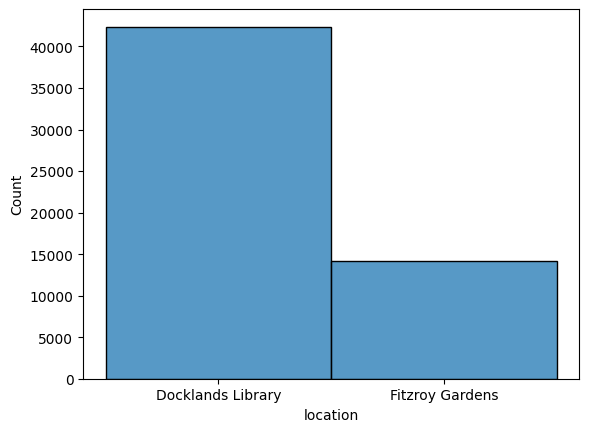

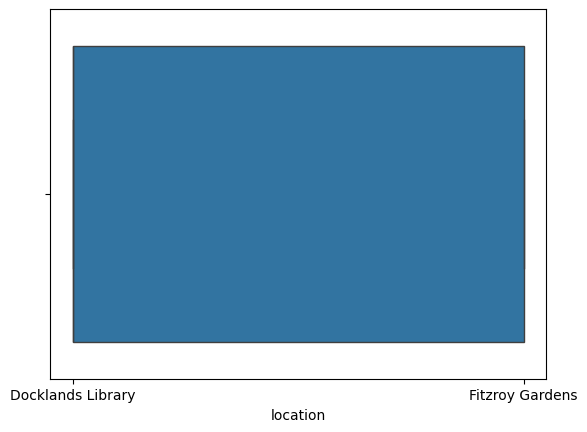

In [ ]:
sns.histplot(data=dataframe,x='location')
plt.show()
sns.boxplot(data=dataframe,x='location')
plt.show()

In [ ]:
dataframe["location"] = dataframe["location"].astype('category')
dataframe.dtypes

timestamp         object
mac               object
boardtype          int64
boardid            int64
temp_max         float64
temp_min         float64
temp_avg         float64
light_max        float64
light_min        float64
light_avg        float64
humidity_min     float64
humidity_max     float64
humidity_avg     float64
model             object
latitude         float64
longitude        float64
elevation        float64
location        category
rowid             object
Position         float64
geolocation       object
dtype: object

In [ ]:
dataframe["location_cat"] = dataframe["location"].cat.codes
dataframe.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation,location_cat
0,2015-01-24T16:15:00+05:30,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253",0
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888",0
2,2015-01-24T16:45:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851",0
3,2015-01-24T17:25:00+05:30,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851",0
4,2015-01-24T17:25:00+05:30,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253",0


Advanced Approach

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
# Get a new clean dataframe
dataframe = dataframe.select_dtypes(include=['object']).copy()

# Specify the columns to encode then fit and transform
encoder = ce.BackwardDifferenceEncoder(cols=["location"])
encoder.fit_transform(dataframe, verbose=1).iloc[:,location:location_cat].head()

ValueError: X does not contain the columns listed in cols

new aproach

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# for the purposes of this analysis, only use a small subset of features

feature_cols = [
    'fuel_type', 'make', 'aspiration', 'highway_mpg', 'city_mpg',
    'curb_weight', 'drive_wheels'
]

# Remove the empty price rows
df_ml = df.dropna(subset=['price'])

X = df_ml[feature_cols]
y = df_ml['price']

#Min-Max Scaler

"[boardtype, boardid ,temp_max, temp_min,
temp_avg,light_max, light_min,light_avg, humidity_min, humidity_max,
humidity_avg]

In [ ]:

# import module
from sklearn.preprocessing import MinMaxScaler
# scale features
scaler = MinMaxScaler()
model=scaler.fit(dataframe)
scaled_data=model.transform(dataframe)

# print scaled features
print(scaled_data)

ValueError: could not convert string to float: '2015-01-24T16:15:00+05:30'

In [35]:
dataframe.head()

,timestamp,mac,model,rowid,geolocation
0,2015-01-24T16:15:00+05:30,0013a20040b31571,ENV,510-20150124104500,"-37.8197121, 144.9413253"
1,2015-01-24T16:45:00+05:30,0013a20040b5b337,ENV,511-20150124111500,"-37.8195002, 144.9418888"
2,2015-01-24T16:45:00+05:30,0013a20040b31583,ENV,509-20150124111500,"-37.8199043, 144.9404851"
3,2015-01-24T17:25:00+05:30,0013a20040b31583,ENV,509-20150124115500,"-37.8199043, 144.9404851"
4,2015-01-24T17:25:00+05:30,0013a20040b31571,ENV,510-20150124115500,"-37.8197121, 144.9413253"


In [34]:
sns.pairplot(dataframe,vars=[boardtype, boardid ,temp_max, temp_min,
temp_avg,light_max, light_min,light_avg, humidity_min, humidity_max,
humidity_avg], hue='Diagnosis')

NameError: name 'boardtype' is not defined